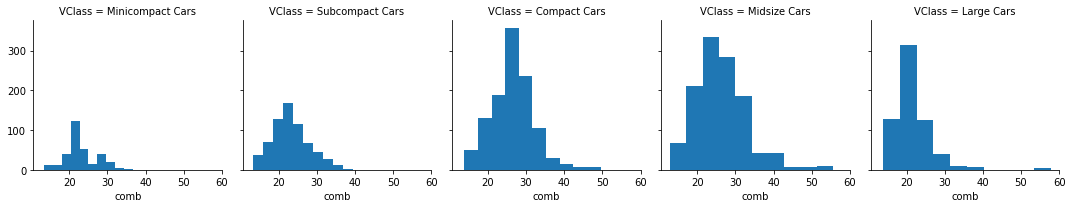

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

# Preparatory Step
fuel_econ = pd.read_csv('fuel_econ.csv')

# Convert the "VClass" column from a plain object type into an ordered categorical type
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);

# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = fuel_econ, col = 'VClass')
g.map(plt.hist, "comb")

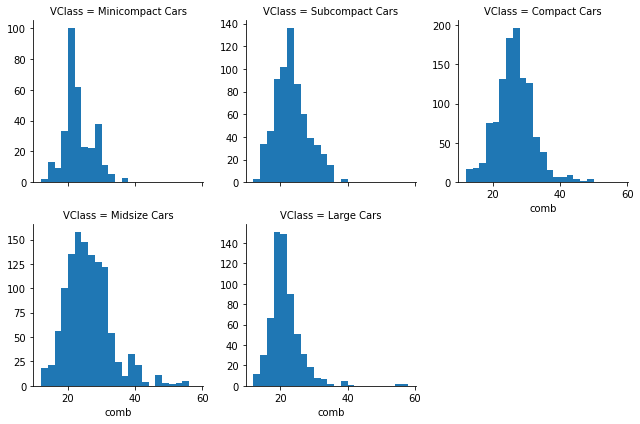

In [3]:
bin_edges = np.arange(12, 58+2, 2)

# Try experimenting with dynamic bin edges
# bin_edges = np.arange(-3, fuel_econ['comb'].max()+1/3, 1/3)

g = sb.FacetGrid(data = fuel_econ, col = 'VClass', col_wrap=3, sharey=False)
g.map(plt.hist, 'comb', bins = bin_edges);

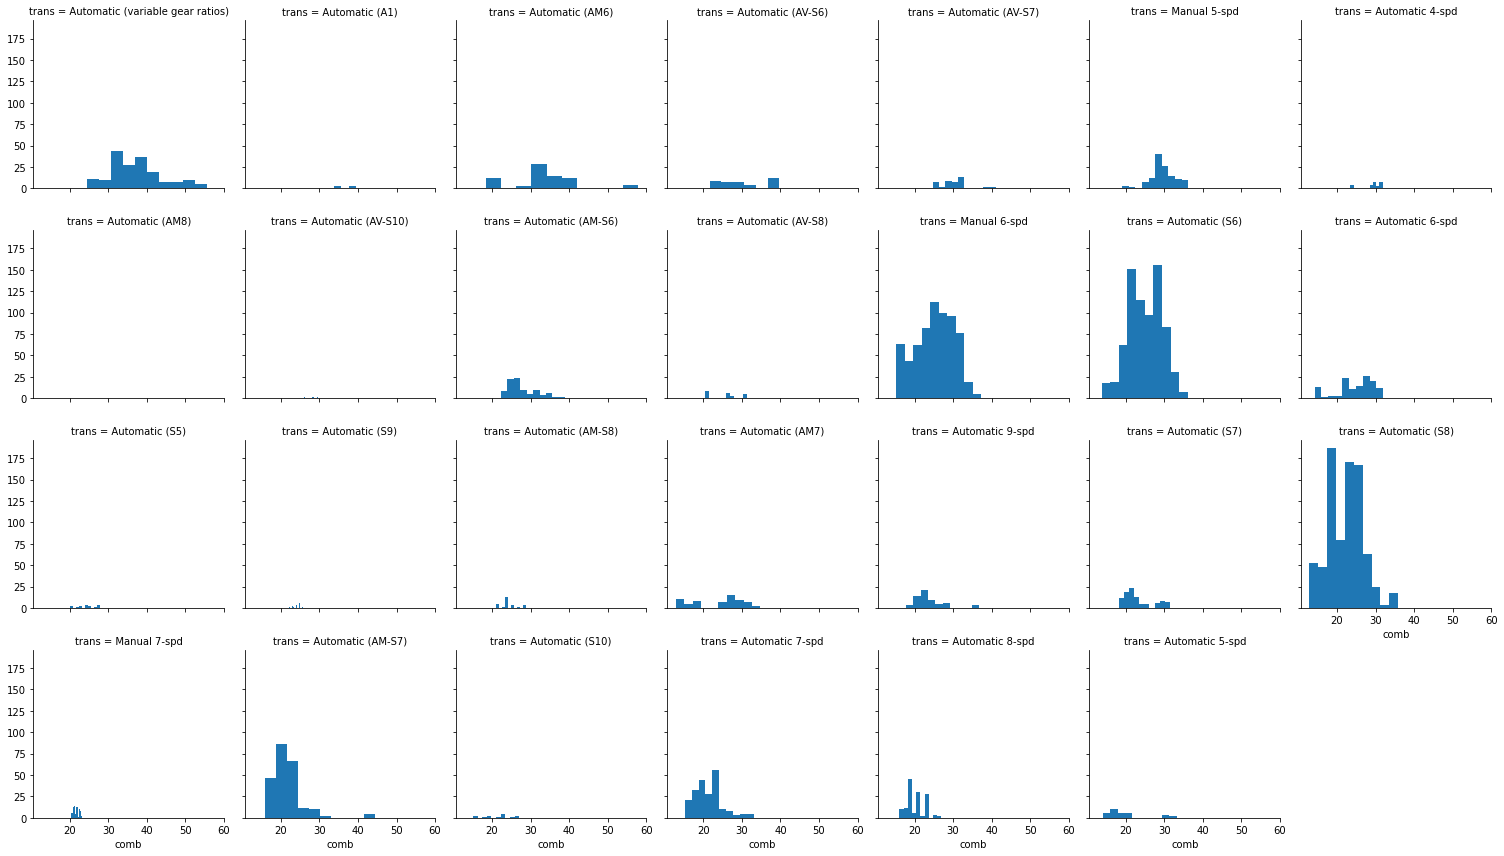

In [4]:
# Find the order in which you want to display the Facets
# For each transmission type, find the combined fuel efficiency
group_means = fuel_econ[['trans', 'comb']].groupby(['trans']).mean()

# Select only the list of transmission type in the decreasing order of combined fuel efficiency
group_order = group_means.sort_values(['comb'], ascending = False).index

# Use the argument col_order to display the FacetGrid in the desirable group_order
g = sb.FacetGrid(data = fuel_econ, col = 'trans', col_wrap = 7, col_order = group_order)
g.map(plt.hist, 'comb')

Text(0, 0.5, 'Avg. Combined Fuel Efficiency (mpg)')

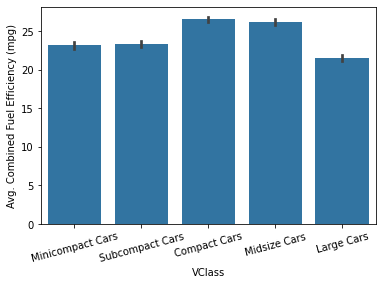

In [5]:
base_color = sb.color_palette()[0]
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color)
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)')

<AxesSubplot:xlabel='VClass', ylabel='comb'>

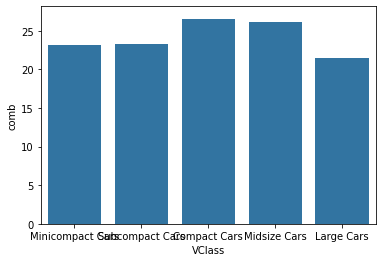

In [8]:
# Try these additional arguments
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, errwidth=0)


<AxesSubplot:xlabel='VClass', ylabel='comb'>

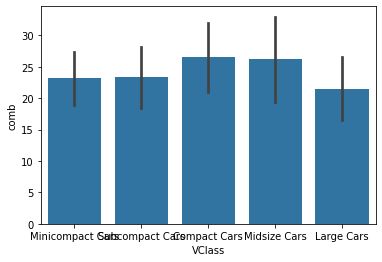

In [7]:
sb.barplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd')

Text(0, 0.5, 'Avg. Combined Fuel Efficiency (mpg)')

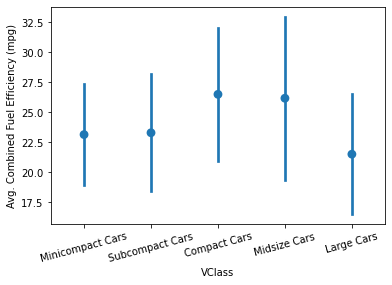

In [9]:
sb.pointplot(data=fuel_econ, x='VClass', y='comb', color=base_color, ci='sd', linestyles="")
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)')

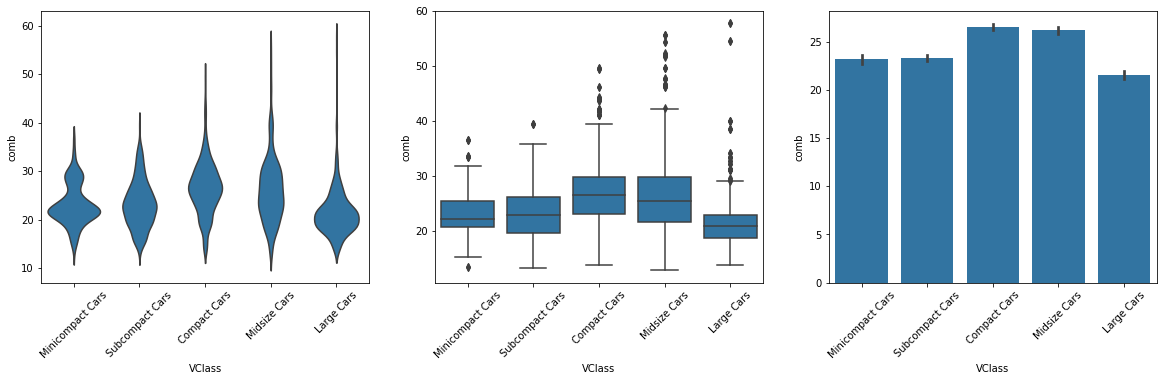

In [10]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
sb.violinplot(data=fuel_econ, x='VClass', y='comb', inner = None,
              color = base_color)
plt.xticks(rotation = 45); # include label rotation due to small subplot size

# center plot: box plot
plt.subplot(1, 3, 2)
sb.boxplot(data=fuel_econ, x='VClass', y='comb', color = base_color)
plt.xticks(rotation = 45);

# right plot: adapted bar chart
plt.subplot(1, 3, 3)
sb.barplot(data=fuel_econ, x='VClass', y='comb', color = base_color)
plt.xticks(rotation = 45);

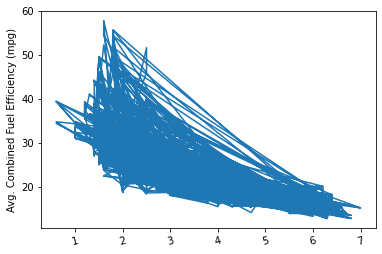

In [11]:
plt.errorbar(data=fuel_econ, x='displ', y='comb')
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

In [13]:
# Set a number of bins into which the data will be grouped.
# Set bin edges, and compute center of each bin 
bin_edges = np.arange(0.6, 7+0.2, 0.2)
bin_centers = bin_edges[:-1] + 0.1

# Cut the bin values into discrete intervals. Returns a Series object.
displ_binned = pd.cut(fuel_econ['displ'], bin_edges, include_lowest = True)
displ_binned

0       (3.6, 3.8]
1       (1.8, 2.0]
2       (3.4, 3.6]
3       (3.4, 3.6]
4       (2.2, 2.4]
           ...    
3924    (1.6, 1.8]
3925    (1.8, 2.0]
3926    (1.8, 2.0]
3927    (3.2, 3.4]
3928    (3.2, 3.4]
Name: displ, Length: 3929, dtype: category
Categories (32, interval[float64]): [(0.599, 0.8] < (0.8, 1.0] < (1.0, 1.2] < (1.2, 1.4] ... (6.2, 6.4] < (6.4, 6.6] < (6.6, 6.8] < (6.8, 7.0]]

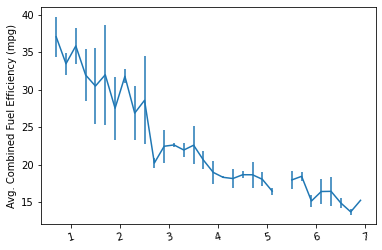

In [14]:
# For the points in each bin, we compute the mean and standard error of the mean.
comb_mean = fuel_econ['comb'].groupby(displ_binned).mean()
comb_std = fuel_econ['comb'].groupby(displ_binned).std()

# Plot the summarized data
plt.errorbar(x=bin_centers, y=comb_mean, yerr=comb_std)
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');